# **Import Libraries**

In [249]:
# data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# **Read and Explain Dataset**

In [250]:
#Read data
data = pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv") 

In [251]:
data.sample(6).reset_index(drop=True)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,70000,MORTGAGE,5.0,VENTURE,C,8000,13.35,0,0.11,Y,2
1,42,68000,RENT,3.0,MEDICAL,B,8500,10.37,0,0.13,N,12
2,39,60197,RENT,6.0,PERSONAL,A,5200,NaN,0,0.09,N,11
3,22,18000,RENT,1.0,EDUCATION,B,7000,10.65,1,0.39,N,3
4,45,23000,OWN,2.0,PERSONAL,A,7000,7.29,0,0.30,N,15
5,22,25200,MORTGAGE,0.0,MEDICAL,B,1000,11.48,1,0.04,N,3


# **Feature Descriptions**

<div style="background-color: #DCDCDC; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
    <ul>
        <li><b>person_age:</b> Age of the individual applying for the loan.</li>
        <li><b>person_income:</b> Annual income of the individual.</li>
        <li><b>person_home_ownership:</b> Type of home ownership of the individual.
            <ul>
                <li>rent: The individual is currently renting a property.</li>
                <li>mortgage: The individual has a mortgage on the property they own.</li>
                <li>own: The individual owns their home outright.</li>
                <li>other: Other categories of home ownership that may be specific to the dataset.</li>
            </ul>
        </li>
        <li><b>person_emp_length:</b> Employment length of the individual in years.</li>
        <li><b>loan_intent:</b> The intent behind the loan application.</li>
        <li><b>loan_grade:</b> The grade assigned to the loan based on the creditworthiness of the borrower.
            <ul>
                <li>A: The borrower has a high creditworthiness, indicating low risk.</li>
                <li>B: The borrower is relatively low-risk, but not as creditworthy as Grade A.</li>
                <li>C: The borrower's creditworthiness is moderate.</li>
                <li>D: The borrower is considered to have higher risk compared to previous grades.</li>
                <li>E: The borrower's creditworthiness is lower, indicating a higher risk.</li>
                <li>F: The borrower poses a significant credit risk.</li>
                <li>G: The borrower's creditworthiness is the lowest, signifying the highest risk.</li>
            </ul>
        </li>
        <li><b>loan_amnt:</b> The loan amount requested by the individual.</li>
        <li><b>loan_int_rate:</b> The interest rate associated with the loan.</li>
        <li><b>loan_status:</b> Loan status, where 0 indicates non-default and 1 indicates default.
            <ul>
                <li>0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.</li>
                <li>1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.</li>
            </ul>
        </li>
        <li><b>loan_percent_income:</b> The percentage of income represented by the loan amount.</li>
        <li><b>cb_person_default_on_file:</b> Historical default of the individual as per credit bureau records.
            <ul>
                <li>Y: The individual has a history of defaults on their credit file.</li>
                <li>N: The individual does not have any history of defaults.</li>
            </ul>
        </li>
        <li><b>cb_preson_cred_hist_length:</b> The length of credit history for the individual.</li>
    </ul>
</div>
istory for the individual.istory for the individual.

# **Exploratory Data Analysis**

In [252]:
data.shape

(32581, 12)

In [253]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [254]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [255]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [257]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [350]:
data.nunique()

index                         32581
person_age                       58
person_income                  4295
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       753
loan_int_rate                   349
loan_status                       2
loan_percent_income              77
cb_person_default_on_file         2
cb_person_cred_hist_length       29
dtype: int64

In [259]:
data.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [260]:
data.duplicated().sum()

165

In [261]:
#MAX AND MIN AGE
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')
        
age_group([0 ,18, 26, 36, 46, 56, 66])


maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 17829
Age between 27 and 36: Number of people 11834
Age between 37 and 46: Number of people 2360
Age between 47 and 56: Number of people 434
Age between 57 and 66: Number of people 98


In [262]:
#max and min income
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 2469
Income between 25001 and 50000: Number of people 11613
Income between 50001 and 75000: Number of people 9622
Income between 75001 and 100000: Number of people 4670
Income between 100001 and inf: Number of people 4207


In [263]:
#min and max loan amount
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 9489
Loan Amount between 5001 and 10000: Number of people 12040
Loan Amount between 10001 and 15000: Number of people 6123
Loan Amount between 15001 and inf: Number of people 4929


# **Dealing with Outliers**

In [264]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [265]:
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)

/tmp/ipykernel_24/3990055313.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)


In [266]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [267]:
data['loan_int_rate'].fillna(data['loan_int_rate'].mean(), inplace=True)

/tmp/ipykernel_24/218005620.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['loan_int_rate'].fillna(data['loan_int_rate'].mean(), inplace=True)


In [268]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [269]:
data['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [270]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [271]:
#person_age max 144 (issue)
#person_emp_length max 123 (issue)
data.reset_index(inplace = True)

# **after 80 it is rare**

<BarContainer object of 58 artists>

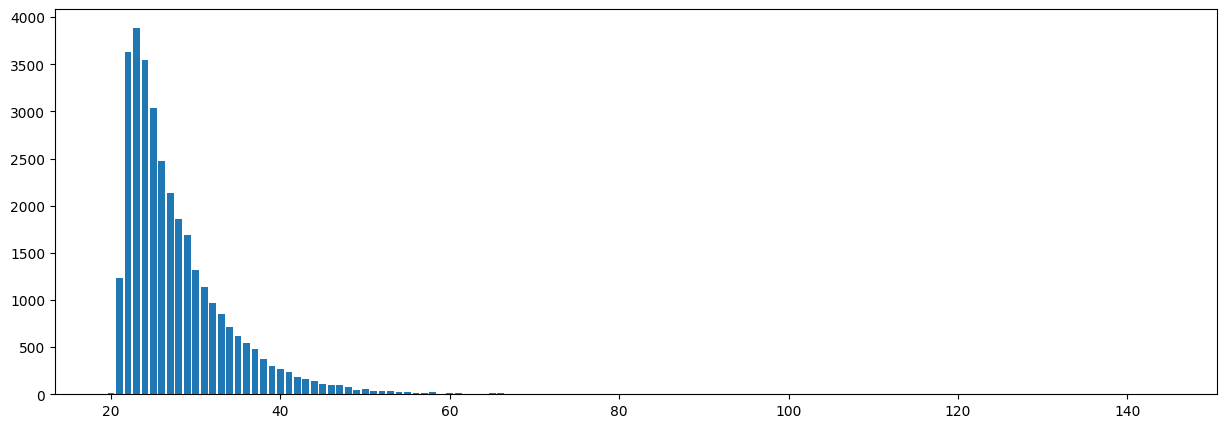

In [272]:
import matplotlib.pyplot as plt 
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)

In [273]:
(data['person_age'].value_counts().values>90).sum()
# dropping rows that have age greater than 90

27

# **Feature Engineering**

In [274]:
data.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   person_home_ownership      32581 non-null  object
 1   loan_intent                32581 non-null  object
 2   loan_grade                 32581 non-null  object
 3   cb_person_default_on_file  32581 non-null  object
dtypes: object(4)
memory usage: 1018.3+ KB


In [275]:
cols = data.select_dtypes(include='O').columns
cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [276]:
for col in cols:
    print("="*50, col)
    print(data[col].value_counts())

================================================== person_home_ownership
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
================================================== loan_intent
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
================================================== loan_grade
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
================================================== cb_person_default_on_file
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


In [277]:
lenc = LabelEncoder()

In [278]:
# loop over each column with the type 'object' => string 
for col in cols:
    # fit_transform 
    data[col] = lenc.fit_transform(data[col])

# displaying
data

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32581 non-null  int64  
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  int64  
 4   person_emp_length           32581 non-null  float64
 5   loan_intent                 32581 non-null  int64  
 6   loan_grade                  32581 non-null  int64  
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               32581 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  cb_person_default_on_file   32581 non-null  int64  
 12  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(10)
memory

# **ANN Model BC**

In [651]:
X = data.drop(['loan_status'],axis = 1)
y =data['loan_status']

In [652]:
X

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,3,123.0,4,3,35000,16.02,0.59,1,3
1,1,21,9600,2,5.0,1,1,1000,11.14,0.10,0,2
2,2,25,9600,0,1.0,3,2,5500,12.87,0.57,0,3
3,3,23,65500,3,4.0,3,2,35000,15.23,0.53,0,2
4,4,24,54400,3,8.0,3,2,35000,14.27,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,0,1.0,4,2,5800,13.16,0.11,0,30
32577,32577,54,120000,0,4.0,4,0,17625,7.49,0.15,0,19
32578,32578,65,76000,3,3.0,2,1,35000,10.99,0.46,0,28
32579,32579,56,150000,0,5.0,4,1,15000,11.48,0.10,0,26


In [653]:
y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [654]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (26064, 12)
X_test shape is  (6517, 12)
y_train shape is  (26064,)
y_test shape is  (6517,)


In [655]:
import tensorflow as tf
import keras

In [656]:
KerasModel = keras.models.Sequential([
            # keras.layers.Input(shape=(17)),
            #keras.layers.Dense(64,  activation = 'relu'),
            # keras.layers.Dropout(0.1),
            keras.layers.Dense(64, activation = 'relu'),
            keras.layers.Dense(128, activation = 'relu'),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(256, activation = 'relu'),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(512, activation = 'relu'),
            #keras.layers.Dense(512, activation = 'tanh'),
            # keras.layers.Dropout(0.3),
            #keras.layers.Dense(32, activation = 'relu'),
            #keras.layers.Dropout(0.2),
            keras.layers.Dense(1, activation = 'sigmoid'),
            ])

In [657]:
KerasModel.compile( optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [658]:
history = KerasModel.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=1000,
                         batch_size=1000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7712 - loss: 0.5255 - val_accuracy: 0.8274 - val_loss: 0.3963
Epoch 2/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8336 - loss: 0.3865 - val_accuracy: 0.8556 - val_loss: 0.3504
Epoch 3/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8537 - loss: 0.3539 - val_accuracy: 0.8640 - val_loss: 0.3349
Epoch 4/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8626 - loss: 0.3385 - val_accuracy: 0.8685 - val_loss: 0.3271
Epoch 5/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8660 - loss: 0.3323 - val_accuracy: 0.8726 - val_loss: 0.3211
Epoch 6/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8711 - loss: 0.3192 - val_accuracy: 0.8734 - val_loss: 0.3144
Epoch 7/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8746 - loss: 0.3179 - val_accuracy: 0.8774 - val_loss: 0.3081
Epoch 8/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8806 - loss: 0.3035 - val_accu

In [659]:
print(KerasModel.summary())

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_190 (Dense)               │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,821 (1.99 MB)

 Trainable params: 174,273 (680.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 348,548 (1.33 MB)

None


In [660]:
%%time
for i in range(1000000) : 
  i+=1

CPU times: user 112 ms, sys: 3.88 ms, total: 116 ms
Wall time: 114 ms


In [661]:
X_test

array([[ 0.47217935,  0.67193019, -0.46424398, ..., -0.37650729,
        -0.46268575,  0.78812259],
       [-0.08218749, -1.06090423, -0.74329198, ..., -0.47015768,
        -0.46268575, -0.93816728],
       [ 0.64771821,  0.35686939, -0.17867798, ...,  0.37269585,
        -0.46268575,  0.78812259],
       ...,
       [ 0.63070657,  0.19933898, -0.77562386, ...,  1.77745175,
        -0.46268575, -0.19832877],
       [-0.64824983, -0.43078263, -0.10446308, ..., -0.65745847,
        -0.46268575, -0.44494161],
       [ 1.2481228 ,  0.51439979, -0.01734125, ..., -0.1892065 ,
        -0.46268575,  0.04828407]])

In [662]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Prediction Shape is (6517, 1)
Prediction items are [[0.02360204]
 [0.04606818]
 [0.05430273]
 [0.05935526]
 [1.        ]]


In [663]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9134 - loss: 0.2561
Model Loss is 0.2541179955005646
Model Accuracy is 0.9133036732673645


In [664]:
history.history['accuracy']

[0.7941221594810486,
 0.8389732837677002,
 0.855471134185791,
 0.8644106984138489,
 0.8669812679290771,
 0.8728898167610168,
 0.8748081922531128,
 0.8793738484382629,
 0.8807934522628784,
 0.8831722140312195,
 0.8863950371742249,
 0.8877378702163696,
 0.8889272809028625,
 0.8905386924743652,
 0.8903852105140686,
 0.8921884298324585,
 0.8949508666992188,
 0.8968308568000793,
 0.8957182168960571,
 0.8963704705238342,
 0.8968692421913147,
 0.900283932685852,
 0.899363100528717,
 0.899363100528717,
 0.8992096185684204,
 0.9001304507255554,
 0.9014732837677002,
 0.9056553244590759,
 0.9048495888710022,
 0.9051181674003601,
 0.9060006141662598,
 0.9069981575012207,
 0.9068063497543335,
 0.9081107974052429,
 0.907113254070282,
 0.9109499454498291,
 0.908839762210846,
 0.9117556810379028,
 0.9111801981925964,
 0.9127916097640991,
 0.9086863398551941,
 0.912945032119751,
 0.9124462604522705,
 0.9141344428062439,
 0.9137891530990601,
 0.9162830114364624,
 0.9129067063331604,
 0.9152086973190308,

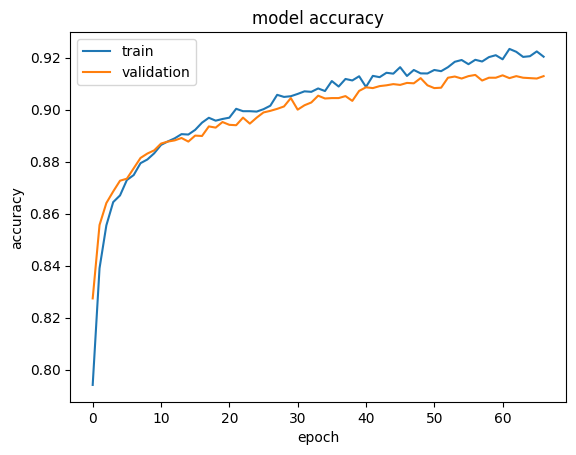

In [665]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

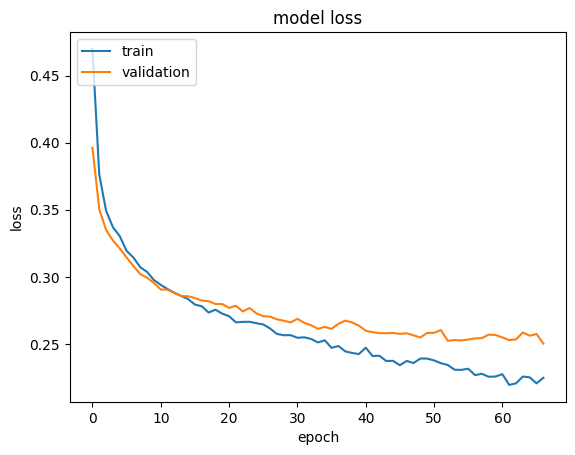

In [666]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [667]:
len(y_test), len(y_pred)

(6517, 6517)

In [668]:
y_pred

array([[0.02360204],
       [0.04606818],
       [0.05430273],
       ...,
       [0.99999994],
       [0.15031296],
       [0.11167078]], dtype=float32)

In [669]:
y_test

20731    0
15517    0
22382    0
24864    0
13781    1
        ..
6636     0
30437    1
22222    1
10193    1
28029    0
Name: loan_status, Length: 6517, dtype: int64

In [670]:
y_pred = [np.round(i[0]) for i in y_pred]
y_pred

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0

In [671]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[5014   67]
 [ 498  938]]


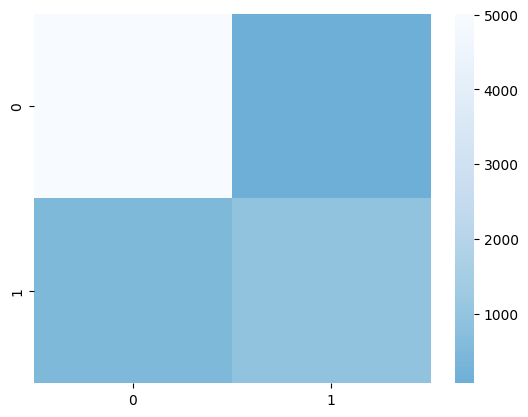

In [672]:
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

In [673]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      5081
           1       0.93      0.65      0.77      1436

    accuracy                           0.91      6517
   macro avg       0.92      0.82      0.86      6517
weighted avg       0.91      0.91      0.91      6517



# **ANN Model MC**

In [684]:
data

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


In [685]:
X2 = data.drop(['loan_grade'],axis = 1)
y2 =data['loan_grade']

In [686]:
X2

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,0,1.0,4,5800,13.16,0,0.11,0,30
32577,32577,54,120000,0,4.0,4,17625,7.49,0,0.15,0,19
32578,32578,65,76000,3,3.0,2,35000,10.99,1,0.46,0,28
32579,32579,56,150000,0,5.0,4,15000,11.48,0,0.10,0,26


In [687]:
y2.nunique()

7

In [688]:
y_cat = tf.keras.utils.to_categorical(y2)
y2[:20]

0     3
1     1
2     2
3     2
4     2
5     0
6     1
7     1
8     0
9     3
10    1
11    0
12    0
13    4
14    0
15    1
16    0
17    5
18    3
19    1
Name: loan_grade, dtype: int64

In [689]:
y_cat[:20]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

In [690]:
from sklearn.model_selection import train_test_split
# Normalize numerical features
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_cat, test_size=0.25, random_state=44, shuffle =True)

print('X_train2 shape is ' , X_train2.shape)
print('X_test2 shape is ' , X_test2.shape)
print('y_train2 shape is ' , y_train2.shape)
print('y_test2 shape is ' , y_test2.shape)

X_train2 shape is  (24435, 12)
X_test2 shape is  (8146, 12)
y_train2 shape is  (24435, 7)
y_test2 shape is  (8146, 7)


In [706]:
KerasModel2 = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(32,  activation = 'tanh'),
        keras.layers.Dense(64,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(256, activation = 'tanh'),
        keras.layers.Dense(7, activation = 'softmax'),
        ])

In [707]:
KerasModel2.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [709]:
history = KerasModel2.fit(X_train2,
                         y_train2,
                         validation_data=(X_test2,y_test2),
                         epochs=100,
                         batch_size=500,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=20,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8461 - loss: 0.4444 - val_accuracy: 0.8380 - val_loss: 0.4663
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8448 - loss: 0.4380 - val_accuracy: 0.8369 - val_loss: 0.4586
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8442 - loss: 0.4272 - val_accuracy: 0.8364 - val_loss: 0.4426
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8455 - loss: 0.4181 - val_accuracy: 0.8373 - val_loss: 0.4314
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8506 - loss: 0.4020 - val_accuracy: 0.8381 - val_loss: 0.4279
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8446 - loss: 0.4066 - val_accuracy: 0.8356 - val_loss: 0.4213
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8489 - loss: 0.3999 - val_accuracy: 0.8402 - val_loss: 0.4258
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8466 - loss: 0.3927 - val_accuracy: 0.8393 - v